In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
data = pd.read_csv("laptop_data.csv")
data.head()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


Preprocessing

In [11]:
#Remove unnamed column (index)

data.drop(columns=['Unnamed: 0'], inplace= True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
#Check Null data

data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [13]:
#check duplicate data

data.duplicated().sum()

29

In [14]:
#convert tipe data int dan hilangkan string

data['Ram'] = data['Ram'].str.replace('GB','')
data['Weight'] = data['Weight'].str.replace('kg', '')

data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


EDA

/var/folders/4k/wxs3blcd3j559j3qjn9l0ymw0000gp/T/ipykernel_1474/2536033907.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'], color='red')


<Axes: xlabel='Price', ylabel='Density'>

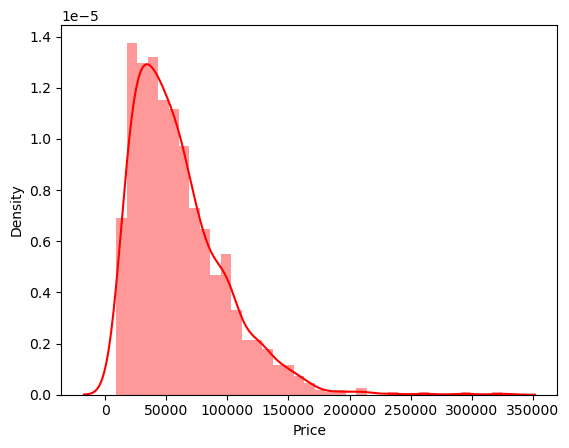

In [15]:
#distribution target

sns.distplot(data['Price'], color='red')

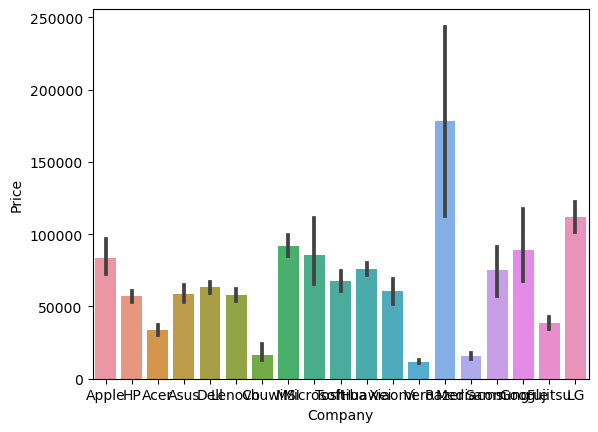

In [20]:
#company column to price column

sns.barplot(x=data['Company'], y=data['Price'])
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

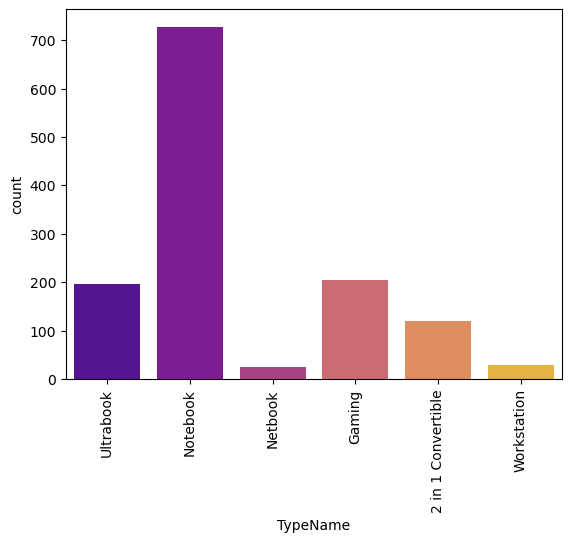

In [24]:
#laptop type

sns.countplot(x=data['TypeName'], palette='plasma')
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

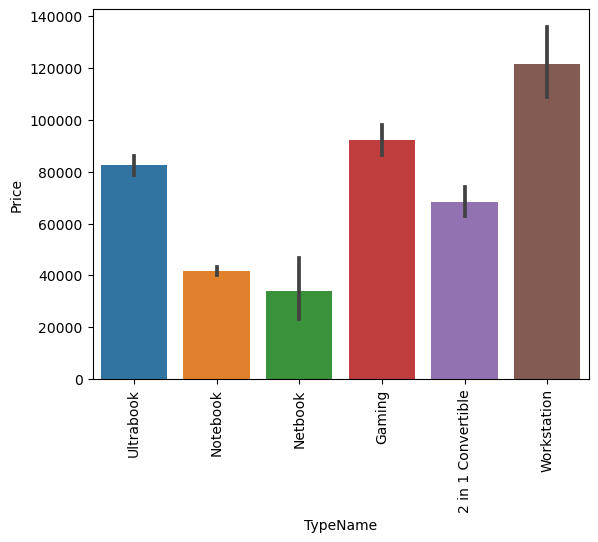

In [25]:
#laptop to price

sns.barplot(x=data['TypeName'],y=data['Price'])
plt.xticks(rotation='vertical')

<Axes: xlabel='Inches', ylabel='Price'>

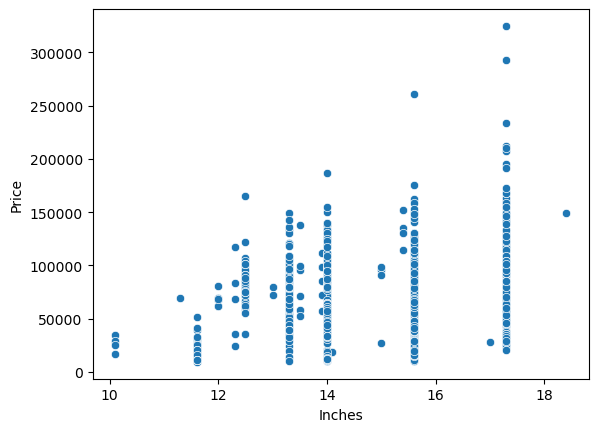

In [26]:
#inches x prices

sns.scatterplot(x=data['Inches'], y=data['Price'])


<Axes: xlabel='Touchscreen', ylabel='count'>

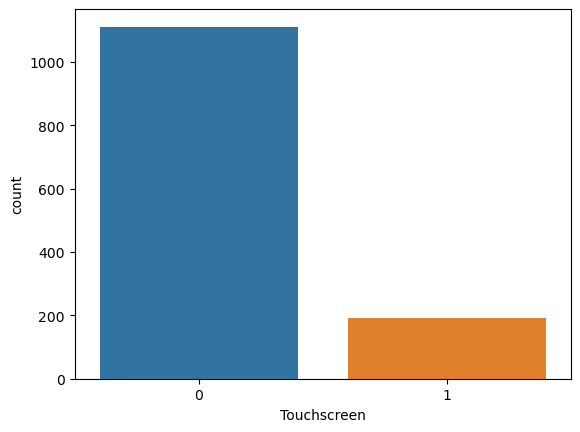

In [28]:
#screen resolution

data['Touchscreen'] = data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

sns.countplot(x=data['Touchscreen'])

<Axes: xlabel='Touchscreen', ylabel='Price'>

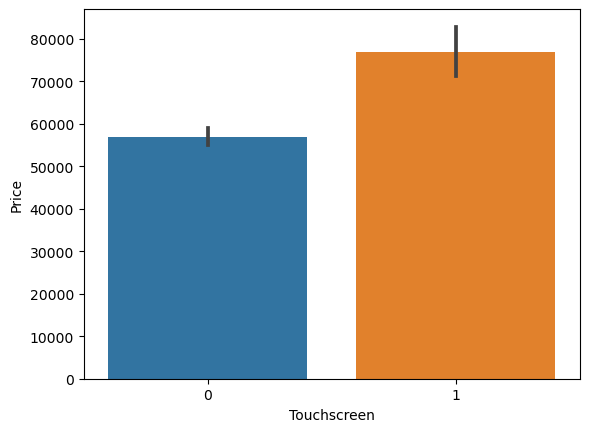

In [29]:
sns.barplot(x=data['Touchscreen'], y=data['Price'])


<Axes: xlabel='IPS', ylabel='Price'>

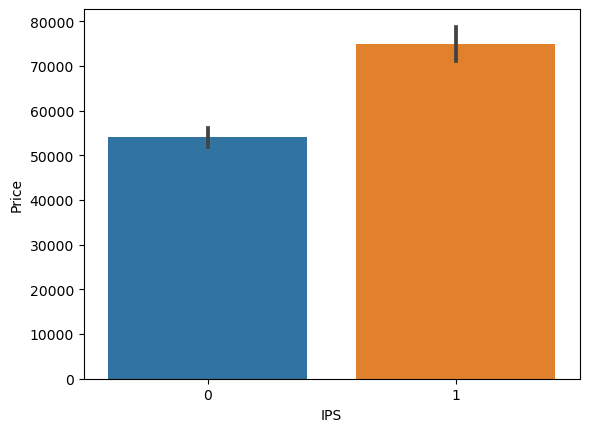

In [30]:
#IPS screen

data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=data['IPS'], y=data['Price'])

<Axes: xlabel='IPS', ylabel='count'>

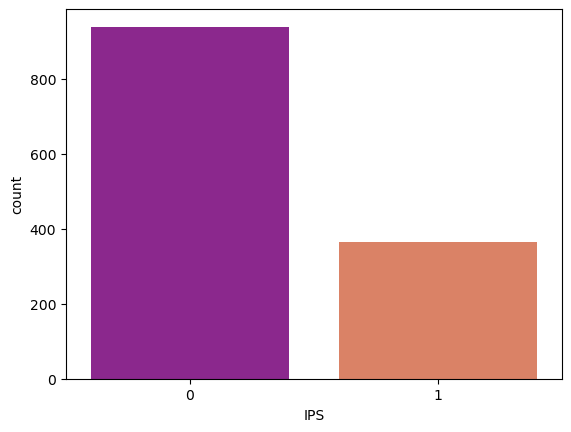

In [31]:
#count IPS

sns.countplot(x=data['IPS'], palette='plasma')

In [35]:
#extract x y resolution
def Xresolution(X_d):
    return X_d.split()[-1].split("x")[0]

def Yresolution(Y_d):
    return Y_d.split()[-1].split("x")[1]

#find x and y
data['X_res'] = data['ScreenResolution'].apply(lambda x: Xresolution(x))
data['Y_res'] = data['ScreenResolution'].apply(lambda y: Yresolution(y))

#convert to numeric
data['X_res'] = data['X_res'].astype('int')
data["Y_res"] = data['Y_res'].astype('int')

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
#corr to price

data.corr()['Price']

/var/folders/4k/wxs3blcd3j559j3qjn9l0ymw0000gp/T/ipykernel_1474/3640381734.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [39]:
#PPI x and y strong correlation(calculate)

data['PPI'] = (((data['X_res']**2) + (data['Y_res']**2)) ** 0.5/data['Inches']).astype('float')
data.corr()['Price'].sort_values(ascending=False)

/var/folders/4k/wxs3blcd3j559j3qjn9l0ymw0000gp/T/ipykernel_1474/4081794416.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price'].sort_values(ascending=False)


Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
PPI            0.473487
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

In [40]:
#droping column not important

data.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'], inplace=True)


In [44]:
#CPU Column Extractor

def processor_type(text):
    cpu = " ".join(text.split()[0:3])
    if cpu == "Intel Core i7" or cpu == "Intel Core i5" or cpu == 'Intel Core i3':
        return cpu
    elif cpu.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
    
data['CPU_Name'] = data['Cpu'].apply(lambda x: processor_type(x))
data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name
839,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,128GB HDD,Intel HD Graphics 620,Windows 10,2.30,31435.2000,0,0,141.211998,Intel Core i5
1108,HP,Notebook,AMD A6-Series 9220 2.5GHz,4,1TB HDD,AMD Radeon R4,Windows 10,2.10,21205.4400,0,0,141.211998,AMD Processor
1181,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,6,256GB SSD,Nvidia GeForce 920M,Windows 10,1.54,44275.6800,0,0,141.211998,Intel Core i7
793,Lenovo,2 in 1 Convertible,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R7 M460,Windows 10,2.08,51095.5200,1,0,141.211998,Intel Core i5
720,Lenovo,Ultrabook,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.17,89864.1792,0,1,209.800683,Intel Core i7


<Axes: xlabel='CPU_Name', ylabel='Price'>

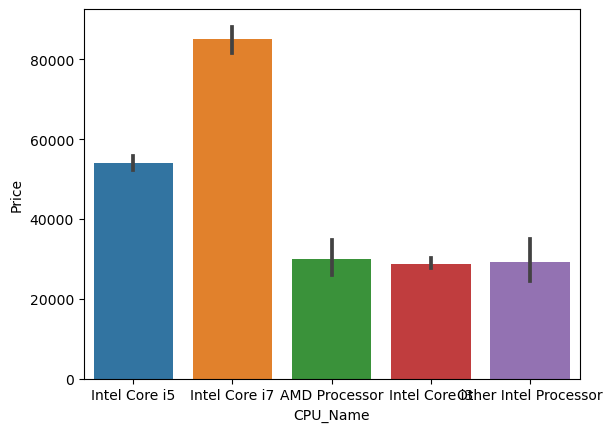

In [45]:
#CPU X Price

sns.barplot(x=data['CPU_Name'], y=data['Price'])

<Axes: xlabel='Ram', ylabel='Price'>

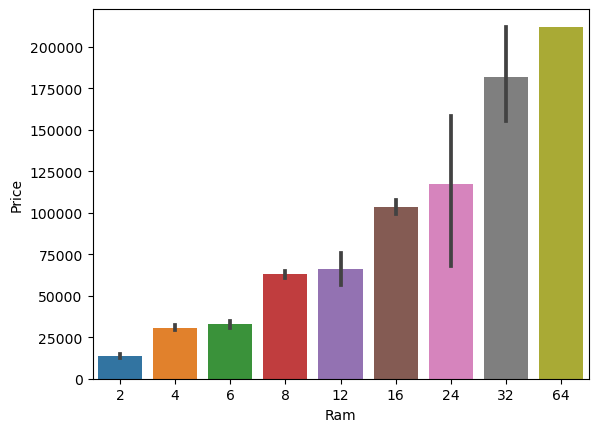

In [46]:
#RAM x Price

sns.barplot(x=data['Ram'], y=data['Price'])

In [47]:
#Memory Column

data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [49]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data['Memory'] = data['Memory'].str.replace('GB', '')
data['Memory'] = data['Memory'].str.replace('TB', '000')

new_data = data['Memory'].str.split("+", n=1, expand=True)

new_data

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [51]:
data['first'] = new_data[0]
data['first'] = data['first'].str.strip()
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [52]:
#flag for disk type

def applychanges(value):
    data['Layer1'+value] = data['first'].apply(lambda x:1 if value in x else 0)

listtoapply = ['HDD', 'SSD', 'Flash Storage', 'Hybrid']
for value in listtoapply:
    applychanges(value)

data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,1,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [53]:
#remove char and keep number

data['first'] = data['first'].str.replace(r'\D','')
data['first'].value_counts()

/var/folders/4k/wxs3blcd3j559j3qjn9l0ymw0000gp/T/ipykernel_1474/258954729.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D','')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [55]:
data['second'] = new_data[1]
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid,second
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,1,0,None
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [56]:
#flag for disk type

def applychanges1(value):
    data['Layer2'+value] = data['second'].apply(lambda x:1 if value in x else 0)

listtoapply = ['HDD', 'SSD', 'Flash Storage', 'Hybrid']
data['second'] = data['second'].fillna("0")
for value in listtoapply:
    applychanges1(value)

data['second'] = data['second'].str.replace(r'\D','')
data['second'].value_counts()

data.head()

/var/folders/4k/wxs3blcd3j559j3qjn9l0ymw0000gp/T/ipykernel_1474/4257876424.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D','')


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid,second,Layer2HDD,Layer2SSD,Layer2Flash Storage,Layer2Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128,0,0,1,0,0,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,256,0,1,0,0,0,0,0,0,0


In [59]:
data['first'] = data['first'].astype('int')
data['second'] = data['second'].astype('int')
data['second'].value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: second, dtype: int64

In [61]:
#multiplying element & storing result

data['HDD'] = (data['first']*data['Layer1HDD']+data['second']*data['Layer2HDD'])
data['SSD'] = (data['first']*data['Layer1SSD']+data['second']*data['Layer2SSD'])
data['Hybrid'] = (data['first']*data['Layer1Hybrid']+data['second']*data['Layer2Hybrid'])
data['Flash_storage'] = (data['first']*data['Layer1Flash Storage']+data['second']*data['Layer2Flash Storage'])

#drop unecesarry column

data.drop(columns=['first','second','Layer1HDD','Layer2HDD','Layer1SSD','Layer2SSD','Layer1Hybrid','Layer2Hybrid','Layer1Flash Storage','Layer2Flash Storage'],inplace=True)

data.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Hybrid,Flash_storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [63]:
data.drop(columns=['Memory'])
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Hybrid,Flash_storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [64]:
data.corr()['Price']

/var/folders/4k/wxs3blcd3j559j3qjn9l0ymw0000gp/T/ipykernel_1474/736241161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_storage   -0.040511
Name: Price, dtype: float64

In [67]:
data.drop(columns=['Hybrid'],inplace=True)
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0


In [68]:
#GPU Analysis

data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

<Axes: xlabel='gpu_brand', ylabel='count'>

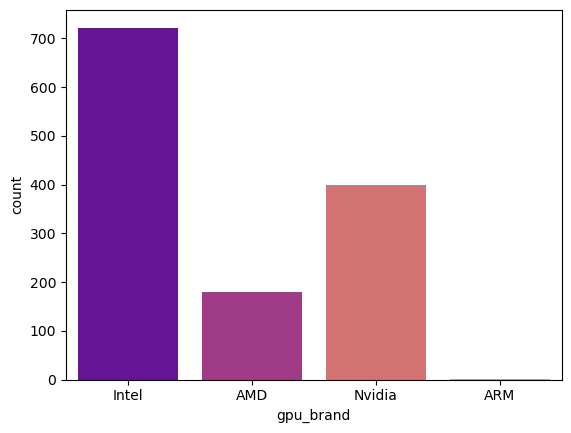

In [70]:
data['gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(x=data['gpu_brand'], palette='plasma')

In [73]:
data = data[data['gpu_brand']!='ARM']

<Axes: xlabel='gpu_brand', ylabel='Price'>

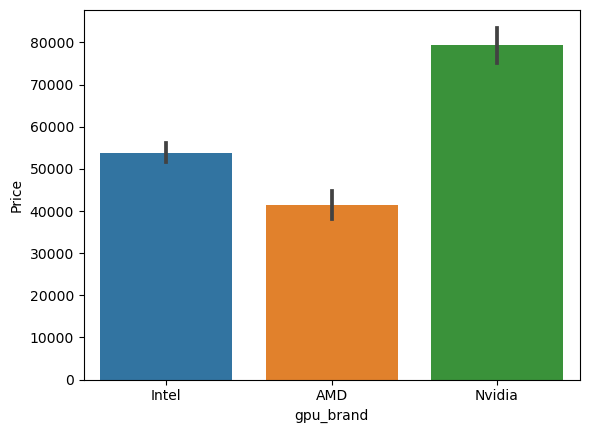

In [74]:
sns.barplot(x=data['gpu_brand'],y=data['Price'])

In [77]:
data.drop(columns=['Gpu'], inplace=True)


KeyError: "['Gpu'] not found in axis"

In [78]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_storage,gpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,Intel


In [79]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

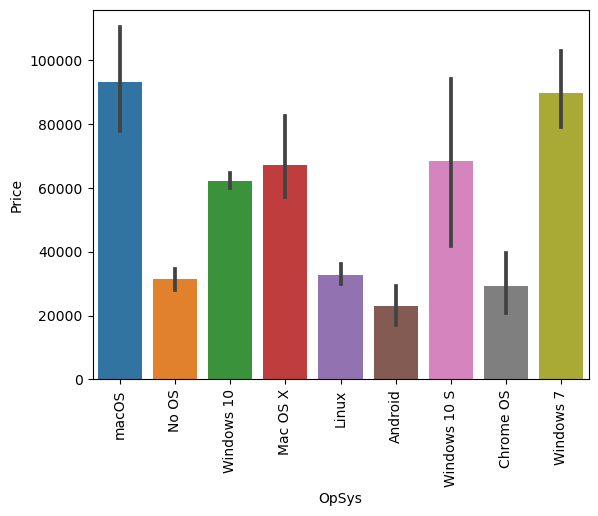

In [81]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [82]:
def setcategory(text):
    if text == 'Windows 10'or text == 'Windows 10 S' or text == 'Windows 7':
        return 'Windows'
    elif text == 'macOS'or text =='Mac OS X':
        return 'Mac'
    else:
        return 'Other'
    
data['OpSys'] = data['OpSys'].apply(lambda x:setcategory(x))
data.head()

/var/folders/4k/wxs3blcd3j559j3qjn9l0ymw0000gp/T/ipykernel_1474/2831401418.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OpSys'] = data['OpSys'].apply(lambda x:setcategory(x))


,Company,TypeName,Cpu,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_storage,gpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,Intel


<Axes: xlabel='OpSys', ylabel='count'>

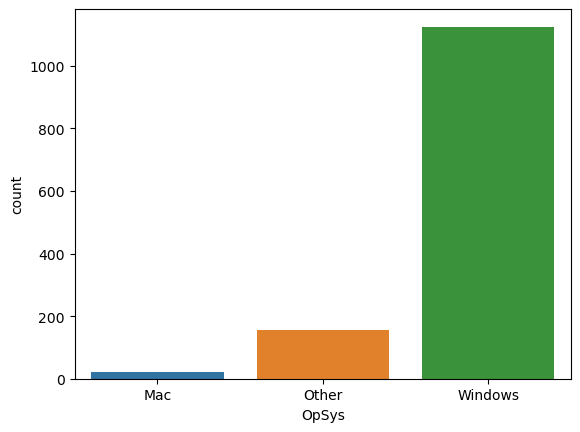

In [85]:
sns.countplot(x=data['OpSys'])

<Axes: xlabel='OpSys', ylabel='Price'>

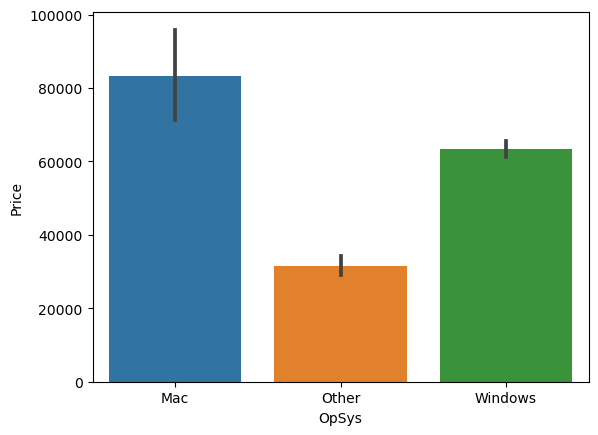

In [86]:
sns.barplot(x=data['OpSys'],y=data['Price'])

/var/folders/4k/wxs3blcd3j559j3qjn9l0ymw0000gp/T/ipykernel_1474/2771971141.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

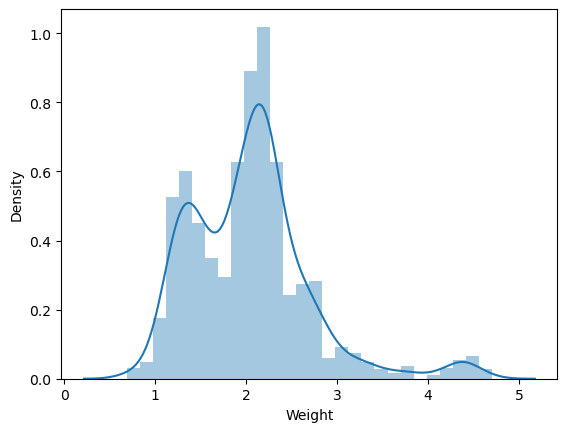

In [93]:
#weight analysis

sns.distplot(data['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

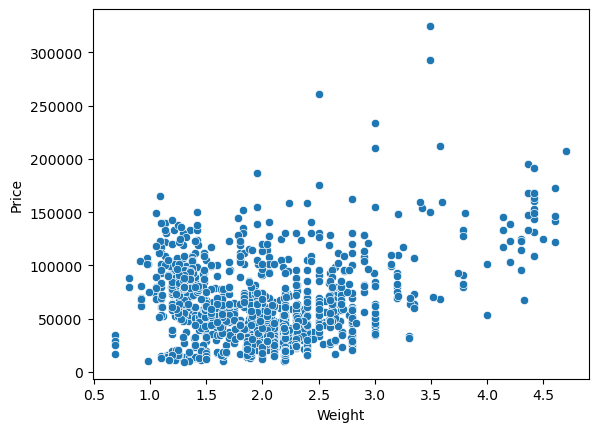

In [92]:
sns.scatterplot(x=data['Weight'],y=data['Price'])

/var/folders/4k/wxs3blcd3j559j3qjn9l0ymw0000gp/T/ipykernel_1474/4196895882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

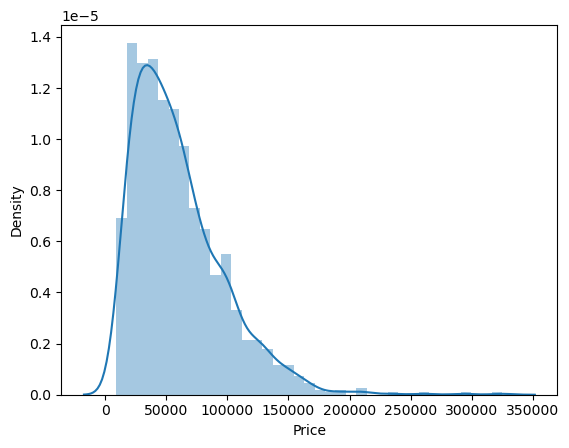

In [94]:
sns.distplot(data['Price'])

/var/folders/4k/wxs3blcd3j559j3qjn9l0ymw0000gp/T/ipykernel_1474/1808067562.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['Price']))


<Axes: xlabel='Price', ylabel='Density'>

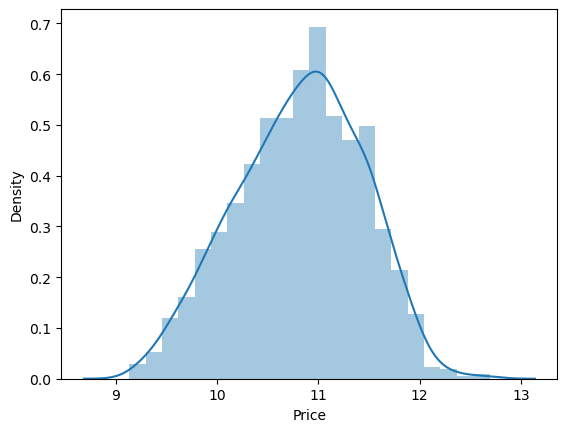

In [95]:
#apply np.log (gaussian distribution)

sns.distplot(np.log(data['Price']))

In [96]:
data.corr()['Price']

/var/folders/4k/wxs3blcd3j559j3qjn9l0ymw0000gp/T/ipykernel_1474/736241161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Ram              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
IPS              0.253320
PPI              0.475368
HDD             -0.096891
SSD              0.670660
Flash_storage   -0.040067
Name: Price, dtype: float64

In [109]:
data.drop(columns=['Cpu','Flash_storage'], inplace=True)
data.drop(columns=['Memory'],inplace=True)
data.head()


,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


Apply Machine Learning

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import  Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [116]:
#split data

X = data.drop(columns=['Price'])
y =  np.log(data['Price'])

X_train, X_test, y_train, y_test  =  train_test_split(X,y,test_size=0.15, random_state=2)
X.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [117]:
X_train.shape, X_test.shape

((1106, 12), (196, 12))

In [118]:
mapper = {i:value for i,  value in enumerate (X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'Touchscreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_Name',
 9: 'HDD',
 10: 'SSD',
 11: 'gpu_brand'}

In [124]:
#Pipeline

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 =  RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe =Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred =   pipe.predict(X_test)

print('R2 Score: ',metrics.r2_score(y_test,y_pred))
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))

R2 Score:  0.8858194276930033
MAE:  0.1588249647843554


/Users/raditya/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [125]:
#export

import pickle

data.to_csv("traineddata.csv", index=False)
pickle.dump(pipe,open('pipe.pkl','wb'))